In [37]:
import math
from collections import Counter
from matplotlib import pyplot as plt
import random
import pandas as pd
from data_science_package import Vector_and_matrix as matrx

In [6]:
def bucketize(point, bucket_size):
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    return (Counter(bucketize(point, bucket_size) for point in points))

def plot_histogram(points, bucket_size, title =''):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(),histogram.values(),width=bucket_size)
    plt.title(title)
    plt.show()

In [15]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2 

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

In [16]:
uniform = [200 * random.random() - 100
          for _ in range(10000)]

normal = [57 * inverse_normal_cdf(random.random())
         for _ in range(10000)]

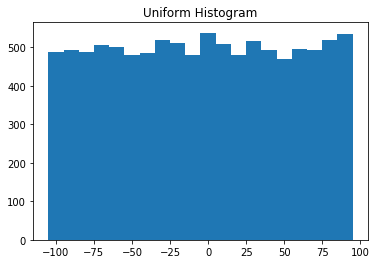

In [17]:
plot_histogram(uniform, 10, "Uniform Histogram")

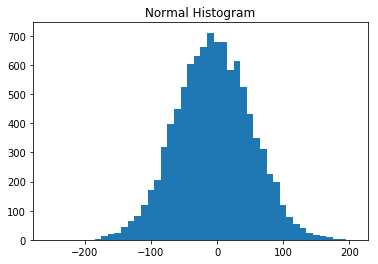

In [18]:
plot_histogram(normal, 10, "Normal Histogram")

In [20]:
def random_normal():
    return inverse_normal_cdf(random.random())

In [21]:
xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() /2 for x in xs]
ys2 = [-x + random_normal() /2 for x in xs]

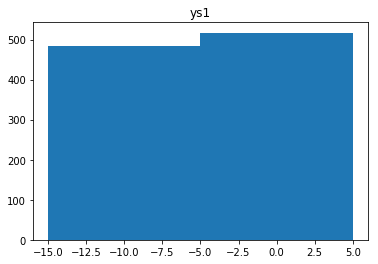

In [22]:
plot_histogram(ys1, 10, 'ys1')

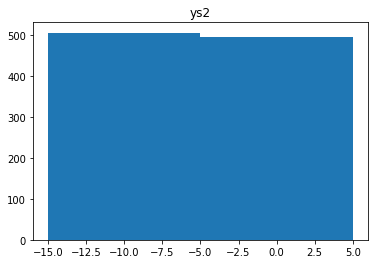

In [23]:
plot_histogram(ys2, 10, 'ys2')

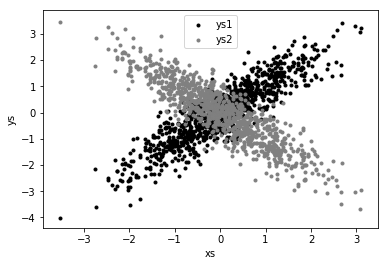

In [24]:
plt.scatter(xs,ys1, marker = '.', color = 'black', label = 'ys1')
plt.scatter(xs, ys2, marker = '.', color = 'gray', label = 'ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)

In [30]:
corr(xs,ys1)

NameError: name 'corr' is not defined